In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('pc.xlsx',sheet_name='SIX Polkadot ETPs')

In [3]:
list(df.iloc[0])

[nan,
 'ADOT SE Equity',
 nan,
 'VDOT SE Equity',
 nan,
 'PLKA SE Equity',
 nan,
 'CDOT SE Equity',
 nan]

In [4]:
list(df.iloc[1])

['Dates',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%']

In [5]:
col = ['Dates',
 '21Shares ADOT TURNOVER',
 '21Shares ADOT AVERAGE_BID',
 'VanEck VDOT TURNOVER',
 'VanEck VDOT AVERAGE_BID',
 'ETC Group PLKA TURNOVER',
 'ETC Group PLKA AVERAGE_BID',
 'Coinshares CDOT TURNOVER',
 'Coinshares CDOT AVERAGE_BID']

In [6]:
df.columns = col

In [7]:
df = df.iloc[2:262]

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df

,Dates,21Shares ADOT TURNOVER,21Shares ADOT AVERAGE_BID,VanEck VDOT TURNOVER,VanEck VDOT AVERAGE_BID,ETC Group PLKA TURNOVER,ETC Group PLKA AVERAGE_BID,Coinshares CDOT TURNOVER,Coinshares CDOT AVERAGE_BID
0,2021-05-03 00:00:00,1782278,0.5378,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-04 00:00:00,1689439,0.5672,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-05 00:00:00,1481502,0.5438,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-06 00:00:00,2987489,0.5426,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-07 00:00:00,1904390,0.5426,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
255,2022-04-25 00:00:00,61007.59,0.3809,1052.17,0.6548,1019.49,0.659,33257.4,0.6599
256,2022-04-26 00:00:00,57578.03,0.3534,1052.17,0.6129,1019.49,0.6426,33257.4,0.6432
257,2022-04-27 00:00:00,26234.57,0.3649,1052.17,0.6533,1019.49,0.6509,33257.4,0.6538
258,2022-04-28 00:00:00,107225,0.4019,1052.17,0.6349,1019.49,0.6523,33257.4,0.6533


In [10]:
df.isna().sum()

Dates                            0
21Shares ADOT TURNOVER           0
21Shares ADOT AVERAGE_BID        0
VanEck VDOT TURNOVER           110
VanEck VDOT AVERAGE_BID        107
ETC Group PLKA TURNOVER        205
ETC Group PLKA AVERAGE_BID     187
Coinshares CDOT TURNOVER       233
Coinshares CDOT AVERAGE_BID    213
dtype: int64

In [11]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [12]:
df.dtypes

Dates                          datetime64[ns]
21Shares ADOT TURNOVER                 object
21Shares ADOT AVERAGE_BID              object
VanEck VDOT TURNOVER                   object
VanEck VDOT AVERAGE_BID                object
ETC Group PLKA TURNOVER                object
ETC Group PLKA AVERAGE_BID             object
Coinshares CDOT TURNOVER               object
Coinshares CDOT AVERAGE_BID            object
dtype: object

In [13]:
for col in list(df)[1:]:
    df[col] = df[col].astype('float')

In [14]:
df.dtypes

Dates                          datetime64[ns]
21Shares ADOT TURNOVER                float64
21Shares ADOT AVERAGE_BID             float64
VanEck VDOT TURNOVER                  float64
VanEck VDOT AVERAGE_BID               float64
ETC Group PLKA TURNOVER               float64
ETC Group PLKA AVERAGE_BID            float64
Coinshares CDOT TURNOVER              float64
Coinshares CDOT AVERAGE_BID           float64
dtype: object

In [15]:
df['Year'] = df['Dates'].dt.year 
df['Month'] = df['Dates'].dt.month 

In [16]:
dict_mnth = {
    1:'JAN',
    2:'FEB',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUG',
    9: 'SEP',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}

# Turnover

In [17]:
turnover_col = [name for name in list(df) if 'TURNOVER' in name]
df_new = df.groupby(['Year','Month'])[turnover_col].sum()
df_new = df_new.reset_index()

In [18]:
df_new

,Year,Month,21Shares ADOT TURNOVER,VanEck VDOT TURNOVER,ETC Group PLKA TURNOVER,Coinshares CDOT TURNOVER
0,2021,5,51484747.20,0.00,0.00,0.0
1,2021,6,16645956.80,0.00,0.00,0.0
2,2021,7,6749461.93,0.00,0.00,0.0
3,2021,8,20855896.60,0.00,0.00,0.0
4,2021,9,50585708.30,0.00,0.00,0.0
5,2021,10,36627313.50,498580.78,0.00,0.0
6,2021,11,36959993.70,1007556.39,0.00,0.0
7,2021,12,20534492.90,32145.22,0.00,0.0
8,2022,1,13144485.90,1041877.75,0.00,0.0
9,2022,2,6795716.20,607005.85,361.13,0.0


In [19]:
yr_month = []
for _,row in df_new.iterrows():
    
    yr_month.append(str(row['Year']).split('.')[0]+'_'+dict_mnth[row['Month']])
    
df_new['yr_month'] = yr_month

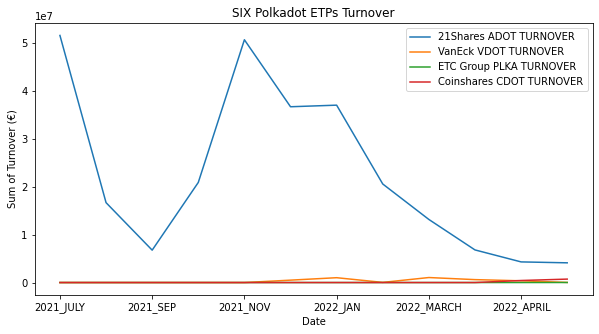

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
# turnover_col = [name for name in list(df_new) if 'TURNOVER' in name]
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for col in turnover_col:
    ax.plot(list(range(len(df_new))),list(df_new[col]),label=col)
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("SIX Polkadot ETPs Turnover")
plt.xlabel("Date")
plt.ylabel("Sum of Turnover (€)")
plt.savefig("sixdot_turnover.png", bbox_inches = "tight")
plt.show()

# Average bid

In [21]:
bid_col = [name for name in list(df) if 'AVERAGE_BID' in name]

In [22]:
df_bid = df.groupby(['Year','Month'])[bid_col].mean()*100
df_bid = df_bid.reset_index()

In [23]:
df_bid

,Year,Month,21Shares ADOT AVERAGE_BID,VanEck VDOT AVERAGE_BID,ETC Group PLKA AVERAGE_BID,Coinshares CDOT AVERAGE_BID
0,2021,5,62.451905,NaN,NaN,NaN
1,2021,6,62.747727,NaN,NaN,NaN
2,2021,7,57.590909,NaN,NaN,NaN
3,2021,8,45.403182,NaN,NaN,NaN
4,2021,9,54.221364,54.175000,NaN,NaN
5,2021,10,55.552857,55.991429,NaN,NaN
6,2021,11,60.490000,58.481364,NaN,NaN
7,2021,12,52.226522,54.446087,NaN,NaN
8,2022,1,51.296190,55.768571,66.963333,NaN
9,2022,2,51.274500,61.900000,67.583000,79.156667


In [24]:
c = ['gold','c','darkgreen','g','b','lightblue','darkblue','brown','grey']

In [25]:
len(bid_col)

4

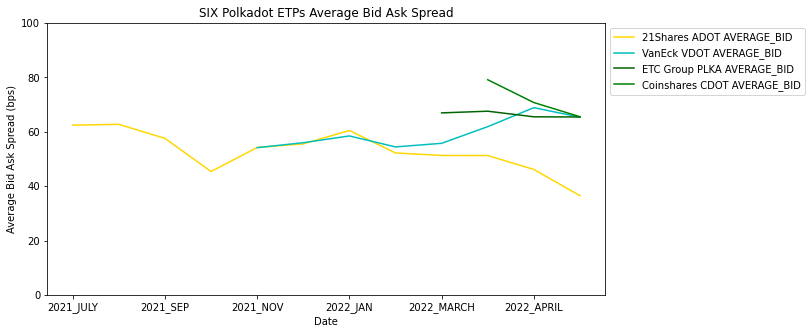

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for i,col in enumerate(bid_col):
    ax.plot(list(range(len(df_bid))),list(df_bid[col]),label=col,color=c[i])
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("SIX Polkadot ETPs Average Bid Ask Spread")
plt.xlabel("Date")
plt.ylabel("Average Bid Ask Spread (bps)")
plt.ylim([0,100])
plt.savefig("sixdot_bid_ask.png")
plt.show()